In [1]:
# IMPORTING UPROOT
import uproot

# IMPORTING SUPPORT PACKAGES
import pandas as pd

# IMPORTING PLOTTIN LIBRARIES
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use(['science', 'grid'])

# IMPORTING ADDITIONAL PACKAGES
from ipywidgets import interact, widgets
import sys
import glob, re

In [2]:
filenames = sorted(glob.glob("../ROOT FILES/SIM*"))
filenames.insert(0, 'Select ROOT File')

In [3]:
drop_down1 = widgets.Dropdown(options=filenames,
                                description='ROOT File:',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down1

Dropdown(description='ROOT File:', layout=Layout(width='max-content'), options=('Select ROOT File', '../ROOT F…

***
#### <font color=orange>WHAT IS INSIDE THIS FILE? TREES!</font>
***

In [5]:
file = uproot.open(drop_down1.value)
trees = file.keys()
trees.insert(0, 'Select Tree')
drop_down2 = widgets.Dropdown(options=trees,
                                description='🌴 Tree:',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down2

Dropdown(description='🌴 Tree:', layout=Layout(width='max-content'), options=('Select Tree', 'Header;1', 'Maste…

In [108]:
# Search inside branches list (OPTIONAL)
search1 = widgets.Text(placeholder='Type something',
                    description='🔎 Search:',
                    disabled=False)
search1

Text(value='', description='🔎 Search:', placeholder='Type something')

In [118]:
# Let's see inside a tree
tree = file[drop_down2.value]
branches = tree.keys() 
branches.insert(0, 'Select Branch')
branch_list = []
next((branch_list.append(item) for item in branches if search1.value in item), None)
options = ['No results'] if len(branch_list) == 0 else (branches if (search1.value == '') else branch_list)
drop_down3 = widgets.Dropdown(options=options,
                                description='🍂 Branch:',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down3

Dropdown(description='🍂 Branch:', layout=Layout(width='max-content'), options=('Select Branch', 'eventID', 'tr…

***
#### <font color=orange>START ANALYSIS</font>
***

In [10]:
# Making the Akward Array a Numpy array
branch = drop_down3.value
df = pd.DataFrame(data=tree.arrays()[branch].to_numpy(), columns=[branch])
df

,truth_hadronReweightNPaths
0,1
1,1
2,25
3,1
4,2
...,...
2906,6
2907,2
2908,10
2909,1


In [11]:
# Making Histogram Legend
ENTRIES = len(df.index)
MEAN = df.mean()[0]
STD = df.std()[0]
label = r'$\textbf{Entries:}$ ' + str("{:}".format(ENTRIES)) + '\n' + r'$\textbf{Mean:}$ ' + str("{:.4}".format(MEAN)) + '\n' +  r'$\textbf{Std Dev}$: ' + str("{:.3}".format(STD))

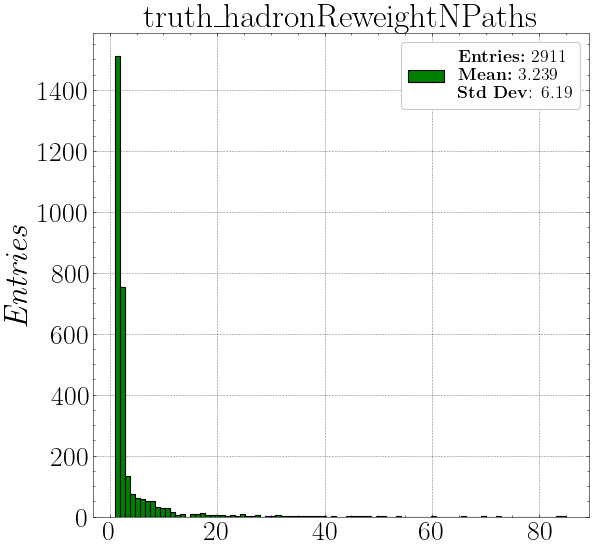

In [13]:
# Plot Histogram!
fig = plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_subplot(111)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
hist = df.hist(ax=ax,bins=90, facecolor = 'g', edgecolor= "black", linewidth=1 , label=label)
title = branch
title = title.replace('_', '\_')
plt.ylabel(r'$\textit{'+ 'Entries' + '}$', fontsize=30) 
plt.title(title, fontsize=30)
plt.legend(prop={'size': 16}, loc=1) 
plt.show()